## 회귀분석

In [1]:
import pandas as pd

In [41]:
anal_df = pd.read_csv("C:/data/now_used/final_data_with_money.csv")
anal_df.head(5)

,상가코드,건축물대장코드,입력날짜,도시,구시군,읍면동,번,지,입주일,상가유형,...,가까운아파트총세대수,가까운아파트평균평당가,아파트거리,주변세대수점수,주변평당가점수,상권코드명,평균월매출금액,평균월매출건수,평균주중매출금액,평균주말매출금액
0,S11110000000004,11110-10014,202006,서울특별시,종로구,동숭동,1,114,1982-12-24,근린상가,...,136,1506.40,519.940374,1.176,10.477,이화장길,1276469803,92138,926358383,350111420
1,S11110000000125,11110-100180009,202006,서울특별시,종로구,동숭동,1,67,2008-07-03,기타상가,...,136,1506.40,497.856179,1.207,10.754,이화장길,1276469803,92138,926358383,350111420
2,S11110000000220,11110-100184402,202006,서울특별시,종로구,관훈동,186,0,2008-12-29,근린상가,...,54,2008.50,249.441747,0.363,19.104,계동길,725431028,41102,530637184,194793844
3,S11110000000602,11110-100190514,202006,서울특별시,종로구,누하동,245,6,2011-09-28,근린상가,...,647,2695.24,426.832578,1.979,16.353,자하문로7길,1266093633,59989,952608422,313485211
4,S11110000000634,11110-100190842,202006,서울특별시,종로구,효제동,19,3,2011-10-14,근린상가,...,282,2046.33,491.694446,0.810,10.063,율곡로16길,701283928,59235,586470792,114813136


In [42]:
# 더미변수 추가
from pandas import get_dummies

type_dummies = pd.get_dummies(anal_df['상가유형'], prefix = 'type')

anal_df = pd.concat([anal_df, type_dummies], axis = 1)

lst = []
[lst.append(1) if i > 0 else lst.append(0) for i in anal_df['주차대수']]

anal_df['주차가능여부'] = lst

lst = []
[lst.append(1) if i > 0 else lst.append(0) for i in anal_df['승강기수']]

anal_df['승강기여부'] = lst

In [43]:
anal_df.columns

Index(['상가코드', '건축물대장코드', '입력날짜', '도시', '구시군', '읍면동', '번', '지', '입주일', '상가유형',
       '지하총층', '지상총층', '대지면적m2', '건축면적m2', '연면적m2', '건폐율', '용적률', '건축구조',
       '높이m', '주차대수', '승강기수', '경도', '위도', 'n', 'usage_area', 'cont_area',
       'RENT', 'rent_ua', 'rent_ca', 'floor', '전철역명', '지하철거리m', '승객수점수',
       '건물별전기사용량', '본번별평균사용량', '횡단보도거리m', '건물연차', '공시지가', '가까운아파트',
       '가까운아파트총세대수', '가까운아파트평균평당가', '아파트거리', '주변세대수점수', '주변평당가점수', '상권코드명',
       '평균월매출금액', '평균월매출건수', '평균주중매출금액', '평균주말매출금액', 'type_근린상가', 'type_기타상가',
       'type_단지내상가', 'type_복합상가', '주차가능여부', '승강기여부'],
      dtype='object')

In [44]:
print(len(anal_df), len(anal_df['상가코드'].unique()))

9422 9262


In [5]:
anal_df = anal_df[['건축물대장코드', '지하총층', '지상총층','연면적m2', '주차대수',
                   '승강기수', 'usage_area', 'cont_area',
       'rent_ua','지하철거리m', '승객수점수',
       '건물별전기사용량', '본번별평균사용량', '횡단보도거리m', '건물연차', '공시지가', 
       '가까운아파트총세대수', '가까운아파트평균평당가', '아파트거리', '주변세대수점수', '주변평당가점수', '상권코드명',
       '평균월매출금액', '평균월매출건수', '평균주중매출금액', '평균주말매출금액', 'type_근린상가', 'type_기타상가',
       'type_단지내상가', 'type_복합상가', '주차가능여부', '승강기여부']]

In [6]:
# 회귀분석

from statsmodels.formula.api import ols

# 모형 만들기 (전체 변수를 넣어보자)

model1 = ols('rent_ua ~ usage_area + cont_area + 지하총층 + 지상총층 + 연면적m2 + 주차대수 + 승강기수 + 지하철거리m + 승객수점수 + 횡단보도거리m + 건물별전기사용량 + 본번별평균사용량 + 건물연차 + 공시지가 + 가까운아파트총세대수 + 가까운아파트평균평당가 + 아파트거리 + 주변세대수점수 + 주변평당가점수 + 평균월매출금액 + 평균월매출건수 + 평균주중매출금액 + 평균주말매출금액 + type_근린상가 + type_기타상가 + type_단지내상가 + type_복합상가 + 주차가능여부 + 승강기여부', anal_df)

# 모형 적합

res = model1.fit()

# 분석 결과 확인

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                rent_ua   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     193.0
Date:                Wed, 14 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:25:08   Log-Likelihood:                -22951.
No. Observations:                9422   AIC:                         4.596e+04
Df Residuals:                    9393   BIC:                         4.617e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.0547      0.245      8.395      0.000       1.575       2.534
usage_area     -0.0005   4.83e-05    -10.050      0.000      -0.001      -0.000
cont_area   -1.684e-06   4.49e-06     -0.375      0.708   -1.05e-05    7.12e-06
지하총층           -0.1074      0.048     -2.220      0.026      -0.202      -0.013
지상총층           -0.0496      0.019     -2.606      0.009      -0.087      -0.012
연면적m2       -6.771e-06   1.88e-05     -0.360      0.719   -4.36e-05    3.01e-05
주차대수           -0.0010      0.001     -0.683      0.495      -0.004       0.002
승강기수            0.1715      0.065      2.638      0.008       0.044       0.299
지하철거리m         -0.0369      0.010     -3.549      0.000      -0.057      -0.017
승객수점수        4.172e-06   4.92e-07      8.473      0.000    3.21e-06    5.14e-06
횡단보도거리m        -0.0020      0.001     -2.930      0.003      -0.003      -0.001
건물별전기사용량     3.895e-06   1.12e-06      3.481      0.001     1.7e-06    6.09e-06
본번별평균사용량     2.762e-06    7.9e-07      3.498      0.000    1.21e-06    4.31e-06
건물연차           -0.0102      0.003     -3.148      0.002      -0.017      -0.004
공시지가         3.223e-07   6.33e-09     50.906      0.000     3.1e-07    3.35e-07
가까운아파트총세대수      0.0001   7.17e-05      1.898      0.058   -4.48e-06       0.000
가까운아파트평균평당가    -0.0001   3.25e-05     -3.916      0.000      -0.000   -6.36e-05
아파트거리          -0.0002      0.000     -1.301      0.193      -0.001       0.000
주변세대수점수         0.0330      0.010      3.388      0.001       0.014       0.052
주변평당가점수        -0.0026      0.001     -2.242      0.025      -0.005      -0.000
평균월매출금액      1.589e-10   2.87e-11      5.536      0.000    1.03e-10    2.15e-10
평균월매출건수     -4.808e-06   1.49e-06     -3.236      0.001   -7.72e-06    -1.9e-06
평균주중매출금액     6.701e-11   4.38e-11      1.531      0.126   -1.88e-11    1.53e-10
평균주말매출금액     1.522e-09   2.35e-10      6.489      0.000    1.06e-09    1.98e-09
type_근린상가       0.7327      0.175      4.181      0.000       0.389       1.076
type_기타상가      -0.1467      0.177     -0.829      0.407      -0.494       0.200
type_단지내상가      2.0714      0.511      4.054      0.000       1.070       3.073
type_복합상가      -0.6028      0.346     -1.741      0.082      -1.281       0.076
주차가능여부         -0.2326      0.070     -3.336      0.001      -0.369      -0.096
승강기여부           0.2867      0.112      2.554      0.011       0.067       0.507
==============================================================================
Omnibus:                     7752.479   Durbin-Watson:                   1.772
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           491387.596
Skew:                           3.524   Prob(JB):                         0.00
Kurtosis:                      37.670   Cond. No.                     2.52e+15
================================================

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

{'whiskers': [<matplotlib.lines.Line2D at 0x1c0c0aab850>,
 'caps': [<matplotlib.lines.Line2D at 0x1c0c0aabf10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c0c0aab4f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c0c0abf610>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c0c0abf910>],
 'means': []}

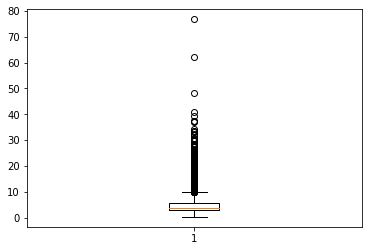

In [8]:
# rent_ua 이상치 파악

min = np.percentile(anal_df['rent_ua'],0)
q1 = np.percentile(anal_df['rent_ua'],25)
q2 = np.percentile(anal_df['rent_ua'],50)
q3 = np.percentile(anal_df['rent_ua'],75)
max = np.percentile(anal_df['rent_ua'],100)

IQR = q3 - q1
iqr = q3 - q1
lf = q1 - 1.5 * iqr
uf = q3 + 1.5 * iqr


plt.boxplot(anal_df['rent_ua'])

## rent_ua 컬럼 이상치 제거

In [9]:
# rent_ua 이상치 제거
anal_df2 = anal_df.copy()

q1 = anal_df2['rent_ua'].quantile(0.25)
q3 = anal_df2['rent_ua'].quantile(0.75)
iqt = 1.5 * (q3-q1)

In [10]:
anal_df2.columns

Index(['건축물대장코드', '지하총층', '지상총층', '연면적m2', '주차대수', '승강기수', 'usage_area',
       'cont_area', 'rent_ua', '지하철거리m', '승객수점수', '건물별전기사용량', '본번별평균사용량',
       '횡단보도거리m', '건물연차', '공시지가', '가까운아파트총세대수', '가까운아파트평균평당가', '아파트거리',
       '주변세대수점수', '주변평당가점수', '상권코드명', '평균월매출금액', '평균월매출건수', '평균주중매출금액',
       '평균주말매출금액', 'type_근린상가', 'type_기타상가', 'type_단지내상가', 'type_복합상가',
       '주차가능여부', '승강기여부'],
      dtype='object')

In [11]:
z = anal_df2[[ '지하총층', '지상총층','연면적m2', '주차대수',
                   '승강기수', 'usage_area', 'cont_area',
       'rent_ua','지하철거리m', '승객수점수',
       '건물별전기사용량', '본번별평균사용량', '횡단보도거리m', '건물연차', '공시지가', 
       '가까운아파트총세대수', '가까운아파트평균평당가', '아파트거리', '주변세대수점수', '주변평당가점수',
       '평균월매출금액', '평균월매출건수', '평균주중매출금액', '평균주말매출금액', 'type_근린상가', 'type_기타상가',
       'type_단지내상가', 'type_복합상가', '주차가능여부', '승강기여부']]

In [12]:
z['rent_ua'][(z['rent_ua'] > (q3 + iqt)) | (z['rent_ua'] < (q1 - iqt))] = None
z

<ipython-input-12-5b6fb51fab7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['rent_ua'][(z['rent_ua'] > (q3 + iqt)) | (z['rent_ua'] < (q1 - iqt))] = None
C:\python\lib\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,평균월매출금액,평균월매출건수,평균주중매출금액,평균주말매출금액,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부
0,1,5,1563.66,0,1,15.50,15.50,NaN,1.082077,71533.898,...,1276469803,92138,926358383,350111420,1,0,0,0,0,1
1,4,5,8585.08,7,4,103.00,143.92,NaN,1.373136,117064.164,...,1276469803,92138,926358383,350111420,0,1,0,0,1,1
2,0,3,172.11,0,1,185.00,200.00,NaN,2.508637,46623.003,...,725431028,41102,530637184,194793844,1,0,0,0,0,1
3,0,4,233.03,2,0,58.22,58.22,3.778770,4.791703,29040.490,...,1266093633,59989,952608422,313485211,1,0,0,0,1,0
4,0,5,253.80,0,0,58.90,66.20,2.037351,3.818611,34219.916,...,701283928,59235,586470792,114813136,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9417,1,4,493.71,3,0,783.79,891.83,2.156190,4.357042,8921.374,...,237774734,14458,184722166,53052568,1,0,0,0,1,0
9418,1,3,988.04,0,0,41.19,41.19,NaN,0.729846,33569.452,...,1138515459,61110,811089104,327426355,1,0,0,0,0,0
9419,1,2,741.99,4,0,127.60,127.60,3.761755,2.046134,16942.142,...,1138515459,61110,811089104,327426355,1,0,0,0,1,0
9420,1,4,659.00,5,0,291.07,321.87,4.672416,6.165909,22247.037,...,731403749,43065,546770943,184632806,1,0,0,0,1,0


In [13]:
z.isnull().sum()

지하총층             0
지상총층             0
연면적m2            0
주차대수             0
승강기수             0
usage_area       0
cont_area        0
rent_ua        551
지하철거리m           0
승객수점수            0
건물별전기사용량         0
본번별평균사용량         0
횡단보도거리m          0
건물연차             0
공시지가             0
가까운아파트총세대수       0
가까운아파트평균평당가      0
아파트거리            0
주변세대수점수          0
주변평당가점수          0
평균월매출금액          0
평균월매출건수          0
평균주중매출금액         0
평균주말매출금액         0
type_근린상가        0
type_기타상가        0
type_단지내상가       0
type_복합상가        0
주차가능여부           0
승강기여부            0
dtype: int64

In [14]:
z = z.dropna(axis = 0, how = 'any')
z.isnull().sum()

지하총층           0
지상총층           0
연면적m2          0
주차대수           0
승강기수           0
usage_area     0
cont_area      0
rent_ua        0
지하철거리m         0
승객수점수          0
건물별전기사용량       0
본번별평균사용량       0
횡단보도거리m        0
건물연차           0
공시지가           0
가까운아파트총세대수     0
가까운아파트평균평당가    0
아파트거리          0
주변세대수점수        0
주변평당가점수        0
평균월매출금액        0
평균월매출건수        0
평균주중매출금액       0
평균주말매출금액       0
type_근린상가      0
type_기타상가      0
type_단지내상가     0
type_복합상가      0
주차가능여부         0
승강기여부          0
dtype: int64

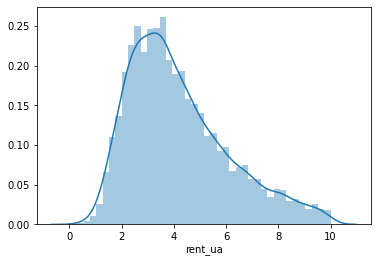

In [15]:
sns.distplot(z.iloc[:,7])
plt.show()

In [16]:
import scipy as sp
import scipy.stats as stats

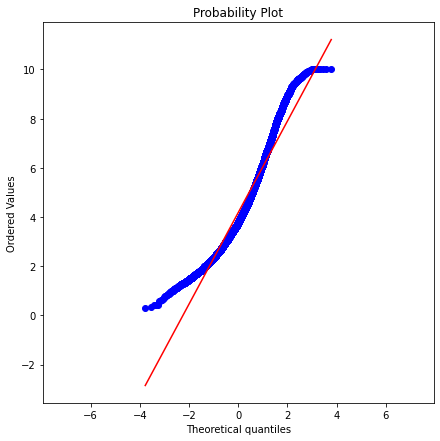

In [17]:
x = z.iloc[:,7]
plt.figure(figsize = (7,7))
sp.stats.probplot(x, plot = plt)
plt.axis('equal')
plt.show()

In [18]:
# 이상값 다시 제거

q1 = z["rent_ua"].quantile(0.25)
q3 = z["rent_ua"].quantile(0.75)
iqt = 1.5 * (q3 - q1)
z1 = z.copy()
z1["rent_ua"][(z1["rent_ua"] > (q3 + iqt)) | (z1["rent_ua"] < (q1 - iqt))] = None
z1

<ipython-input-18-02376eca61ea>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z1["rent_ua"][(z1["rent_ua"] > (q3 + iqt)) | (z1["rent_ua"] < (q1 - iqt))] = None


,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,평균월매출금액,평균월매출건수,평균주중매출금액,평균주말매출금액,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부
3,0,4,233.03,2,0,58.22,58.22,3.778770,4.791703,29040.490,...,1266093633,59989,952608422,313485211,1,0,0,0,1,0
4,0,5,253.80,0,0,58.90,66.20,2.037351,3.818611,34219.916,...,701283928,59235,586470792,114813136,1,0,0,0,0,0
6,5,6,3869.33,4,2,370.05,370.05,4.323740,2.095677,41692.829,...,1276469803,92138,926358383,350111420,0,1,0,0,1,1
8,1,3,1211.93,5,0,76.03,76.03,5.392608,1.090460,59317.670,...,725431028,41102,530637184,194793844,1,0,0,0,1,0
9,1,4,458.95,0,0,73.03,73.03,4.792551,3.944218,24836.371,...,1132740284,82393,810808853,321931432,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9416,1,5,5068.70,15,0,440.82,450.82,4.196724,3.577587,47394.330,...,845419656,45138,598585337,246834320,1,0,0,0,1,0
9417,1,4,493.71,3,0,783.79,891.83,2.156190,4.357042,8921.374,...,237774734,14458,184722166,53052568,1,0,0,0,1,0
9419,1,2,741.99,4,0,127.60,127.60,3.761755,2.046134,16942.142,...,1138515459,61110,811089104,327426355,1,0,0,0,1,0
9420,1,4,659.00,5,0,291.07,321.87,4.672416,6.165909,22247.037,...,731403749,43065,546770943,184632806,1,0,0,0,1,0


In [19]:
z1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8871 entries, 3 to 9421
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   지하총층         8871 non-null   int64  
 1   지상총층         8871 non-null   int64  
 2   연면적m2        8871 non-null   float64
 3   주차대수         8871 non-null   int64  
 4   승강기수         8871 non-null   int64  
 5   usage_area   8871 non-null   float64
 6   cont_area    8871 non-null   float64
 7   rent_ua      8707 non-null   float64
 8   지하철거리m       8871 non-null   float64
 9   승객수점수        8871 non-null   float64
 10  건물별전기사용량     8871 non-null   int64  
 11  본번별평균사용량     8871 non-null   float64
 12  횡단보도거리m      8871 non-null   float64
 13  건물연차         8871 non-null   int64  
 14  공시지가         8871 non-null   int64  
 15  가까운아파트총세대수   8871 non-null   int64  
 16  가까운아파트평균평당가  8871 non-null   float64
 17  아파트거리        8871 non-null   float64
 18  주변세대수점수      8871 non-null   float64
 19  주변평당가점

In [20]:
z1 = z1.dropna(axis = 0, how = 'any')
z1

,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,평균월매출금액,평균월매출건수,평균주중매출금액,평균주말매출금액,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부
3,0,4,233.03,2,0,58.22,58.22,3.778770,4.791703,29040.490,...,1266093633,59989,952608422,313485211,1,0,0,0,1,0
4,0,5,253.80,0,0,58.90,66.20,2.037351,3.818611,34219.916,...,701283928,59235,586470792,114813136,1,0,0,0,0,0
6,5,6,3869.33,4,2,370.05,370.05,4.323740,2.095677,41692.829,...,1276469803,92138,926358383,350111420,0,1,0,0,1,1
8,1,3,1211.93,5,0,76.03,76.03,5.392608,1.090460,59317.670,...,725431028,41102,530637184,194793844,1,0,0,0,1,0
9,1,4,458.95,0,0,73.03,73.03,4.792551,3.944218,24836.371,...,1132740284,82393,810808853,321931432,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9416,1,5,5068.70,15,0,440.82,450.82,4.196724,3.577587,47394.330,...,845419656,45138,598585337,246834320,1,0,0,0,1,0
9417,1,4,493.71,3,0,783.79,891.83,2.156190,4.357042,8921.374,...,237774734,14458,184722166,53052568,1,0,0,0,1,0
9419,1,2,741.99,4,0,127.60,127.60,3.761755,2.046134,16942.142,...,1138515459,61110,811089104,327426355,1,0,0,0,1,0
9420,1,4,659.00,5,0,291.07,321.87,4.672416,6.165909,22247.037,...,731403749,43065,546770943,184632806,1,0,0,0,1,0


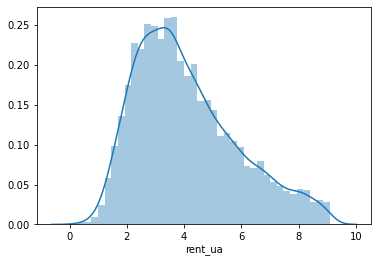

In [21]:
sns.distplot(z1.iloc[:,7])
plt.show()

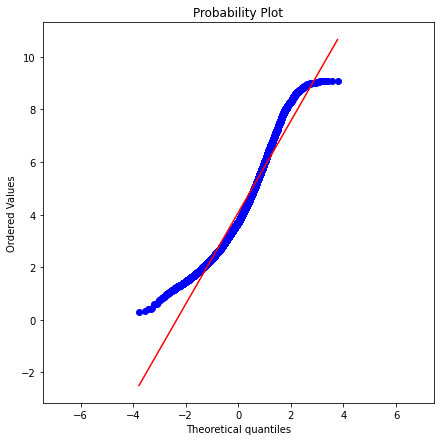

In [22]:
x = z1.iloc[:,7]
plt.figure(figsize = (7,7))
sp.stats.probplot(x, plot = plt)
plt.axis('equal')
plt.show()

## 상관계수 히트맵 그려보기

In [23]:
# 상관계수 확인

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['font.family'] = 'NanumGothic'

# 스피어만 상관계수

corr_ua_s = z1.corr(method = 'spearman')
corr_ua_s

,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,평균월매출금액,평균월매출건수,평균주중매출금액,평균주말매출금액,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부
지하총층,1.000000,0.476291,0.575260,0.309311,0.372577,0.180810,0.220024,0.116090,-0.013300,0.155444,...,0.009557,0.056910,0.084443,0.063182,-0.408089,0.334729,0.079078,0.230200,0.213579,0.339065
지상총층,0.476291,1.000000,0.725197,0.558934,0.621487,0.259671,0.293315,0.157250,-0.027027,0.177366,...,0.018367,0.122764,0.144170,0.111530,-0.404816,0.348805,0.067432,0.189812,0.486362,0.612658
연면적m2,0.575260,0.725197,1.000000,0.569661,0.549637,0.309339,0.353335,0.177791,-0.000096,0.150096,...,-0.001005,0.080942,0.116832,0.081243,-0.443107,0.390345,0.066261,0.188824,0.415414,0.535225
주차대수,0.309311,0.558934,0.569661,1.000000,0.455251,0.210189,0.237846,0.087996,0.035592,0.066087,...,0.013092,0.068402,0.097071,0.089138,-0.244659,0.181188,0.055767,0.184460,0.889709,0.440475
승강기수,0.372577,0.621487,0.549637,0.455251,1.000000,0.247666,0.278948,0.185673,-0.049763,0.179547,...,0.008672,0.093857,0.124926,0.093243,-0.402810,0.325663,0.082843,0.237498,0.343179,0.993999
usage_area,0.180810,0.259671,0.309339,0.210189,0.247666,1.000000,0.970822,0.043896,-0.065422,0.278538,...,0.062505,0.161193,0.191158,0.190511,-0.156389,0.148885,0.007226,0.044329,0.175229,0.251575
cont_area,0.220024,0.293315,0.353335,0.237846,0.278948,0.970822,1.000000,0.083392,-0.064641,0.289938,...,0.060453,0.162467,0.195309,0.190891,-0.196751,0.180227,0.009907,0.073464,0.192717,0.278424
rent_ua,0.116090,0.157250,0.177791,0.087996,0.185673,0.043896,0.083392,1.000000,-0.231156,0.351577,...,0.120060,0.272812,0.288787,0.296044,-0.142558,0.117631,0.040110,0.074056,0.046703,0.177011
지하철거리m,-0.013300,-0.027027,-0.000096,0.035592,-0.049763,-0.065422,-0.064641,-0.231156,1.000000,-0.475976,...,-0.179014,-0.247147,-0.244986,-0.220447,0.065746,-0.064901,-0.009387,-0.010437,0.054894,-0.046726
승객수점수,0.155444,0.177366,0.150096,0.066087,0.179547,0.278538,0.289938,0.351577,-0.475976,1.000000,...,0.227116,0.453899,0.444773,0.397052,-0.173459,0.147358,0.021725,0.089302,0.033654,0.174227


In [24]:
import matplotlib.pylab as plt
from matplotlib import pyplot
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = 'C:/windows/fonts/malgun.ttf').get_name()
rc('font', family = font_name)

C:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


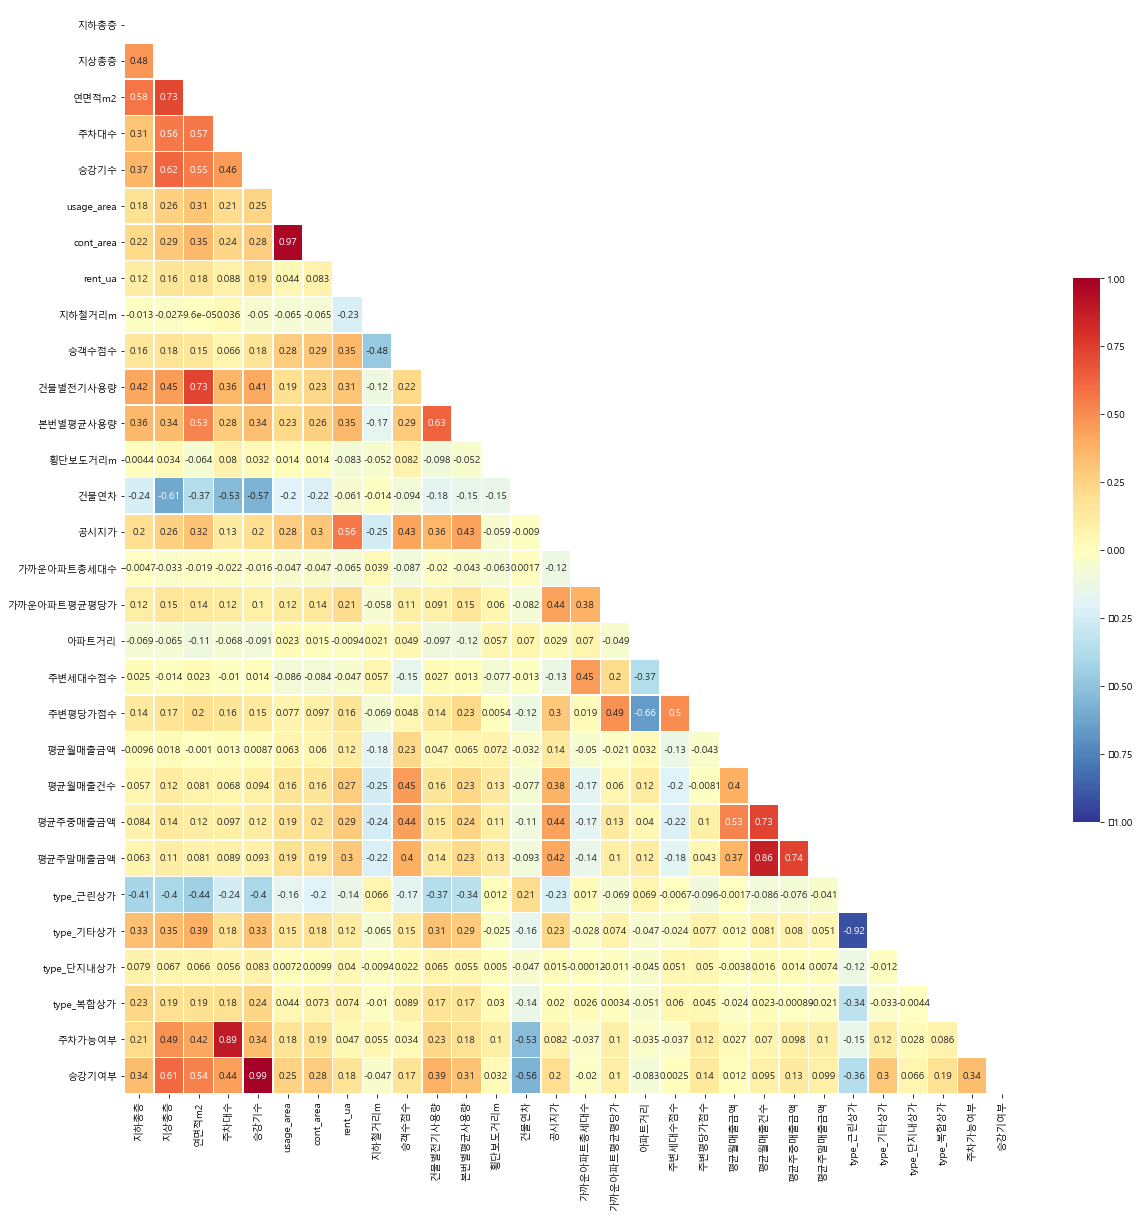

In [25]:
# 스피어만 상관계수 히트맵

mask = np.zeros_like(corr_ua_s, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots( figsize=(20,20) )

sns.heatmap(corr_ua_s,
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

In [26]:
# 회귀분석

from statsmodels.formula.api import ols

# 모형 만들기 (전체 변수를 넣어보자)

model1 = ols('rent_ua ~ usage_area + cont_area + 지하총층 + 지상총층 + 연면적m2 + 주차대수 + 승강기수 + 지하철거리m + 승객수점수 + 횡단보도거리m + 건물별전기사용량 + 본번별평균사용량 + 건물연차 + 공시지가 + 가까운아파트총세대수 + 가까운아파트평균평당가 + 아파트거리 + 주변세대수점수 + 주변평당가점수 + 평균월매출금액 + 평균월매출건수 + 평균주중매출금액 + 평균주말매출금액 + type_근린상가 + type_기타상가 + type_단지내상가 + type_복합상가 + 주차가능여부 + 승강기여부', anal_df)

# 모형 적합

res = model1.fit()

# 분석 결과 확인

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                rent_ua   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     193.0
Date:                Wed, 14 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:25:11   Log-Likelihood:                -22951.
No. Observations:                9422   AIC:                         4.596e+04
Df Residuals:                    9393   BIC:                         4.617e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.0547      0.245      8.395      0.000       1.575       2.534
usage_area     -0.0005   4.83e-05    -10.050      0.000      -0.001      -0.000
cont_area   -1.684e-06   4.49e-06     -0.375      0.708   -1.05e-05    7.12e-06
지하총층           -0.1074      0.048     -2.220      0.026      -0.202      -0.013
지상총층           -0.0496      0.019     -2.606      0.009      -0.087      -0.012
연면적m2       -6.771e-06   1.88e-05     -0.360      0.719   -4.36e-05    3.01e-05
주차대수           -0.0010      0.001     -0.683      0.495      -0.004       0.002
승강기수            0.1715      0.065      2.638      0.008       0.044       0.299
지하철거리m         -0.0369      0.010     -3.549      0.000      -0.057      -0.017
승객수점수        4.172e-06   4.92e-07      8.473      0.000    3.21e-06    5.14e-06
횡단보도거리m        -0.0020      0.001     -2.930      0.003      -0.003      -0.001
건물별전기사용량     3.895e-06   1.12e-06      3.481      0.001     1.7e-06    6.09e-06
본번별평균사용량     2.762e-06    7.9e-07      3.498      0.000    1.21e-06    4.31e-06
건물연차           -0.0102      0.003     -3.148      0.002      -0.017      -0.004
공시지가         3.223e-07   6.33e-09     50.906      0.000     3.1e-07    3.35e-07
가까운아파트총세대수      0.0001   7.17e-05      1.898      0.058   -4.48e-06       0.000
가까운아파트평균평당가    -0.0001   3.25e-05     -3.916      0.000      -0.000   -6.36e-05
아파트거리          -0.0002      0.000     -1.301      0.193      -0.001       0.000
주변세대수점수         0.0330      0.010      3.388      0.001       0.014       0.052
주변평당가점수        -0.0026      0.001     -2.242      0.025      -0.005      -0.000
평균월매출금액      1.589e-10   2.87e-11      5.536      0.000    1.03e-10    2.15e-10
평균월매출건수     -4.808e-06   1.49e-06     -3.236      0.001   -7.72e-06    -1.9e-06
평균주중매출금액     6.701e-11   4.38e-11      1.531      0.126   -1.88e-11    1.53e-10
평균주말매출금액     1.522e-09   2.35e-10      6.489      0.000    1.06e-09    1.98e-09
type_근린상가       0.7327      0.175      4.181      0.000       0.389       1.076
type_기타상가      -0.1467      0.177     -0.829      0.407      -0.494       0.200
type_단지내상가      2.0714      0.511      4.054      0.000       1.070       3.073
type_복합상가      -0.6028      0.346     -1.741      0.082      -1.281       0.076
주차가능여부         -0.2326      0.070     -3.336      0.001      -0.369      -0.096
승강기여부           0.2867      0.112      2.554      0.011       0.067       0.507
==============================================================================
Omnibus:                     7752.479   Durbin-Watson:                   1.772
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           491387.596
Skew:                           3.524   Prob(JB):                         0.00
Kurtosis:                      37.670   Cond. No.                     2.52e+15
================================================

## 주요컬럼 이상치 제거
상관계수가 0.3 이상인 변수의 이상치를 제거한다.
* 승객수점수, 건물별전기사용량, 본번별평균사용량, 공시지가, 평균주말매출금액

In [27]:
z1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8707 entries, 3 to 9421
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   지하총층         8707 non-null   int64  
 1   지상총층         8707 non-null   int64  
 2   연면적m2        8707 non-null   float64
 3   주차대수         8707 non-null   int64  
 4   승강기수         8707 non-null   int64  
 5   usage_area   8707 non-null   float64
 6   cont_area    8707 non-null   float64
 7   rent_ua      8707 non-null   float64
 8   지하철거리m       8707 non-null   float64
 9   승객수점수        8707 non-null   float64
 10  건물별전기사용량     8707 non-null   int64  
 11  본번별평균사용량     8707 non-null   float64
 12  횡단보도거리m      8707 non-null   float64
 13  건물연차         8707 non-null   int64  
 14  공시지가         8707 non-null   int64  
 15  가까운아파트총세대수   8707 non-null   int64  
 16  가까운아파트평균평당가  8707 non-null   float64
 17  아파트거리        8707 non-null   float64
 18  주변세대수점수      8707 non-null   float64
 19  주변평당가점

In [28]:
# 승객수점수 이상값 제거

q1 = z1["승객수점수"].quantile(0.25)
q3 = z1["승객수점수"].quantile(0.75)
iqt = 1.5 * (q3 - q1)
z2 = z1.copy()
z2["승객수점수"][(z2["승객수점수"] > (q3 + iqt)) | (z2["승객수점수"] < (q1 - iqt))] = None

z2 = z2.dropna(axis = 0, how= 'any')
z2

<ipython-input-28-1eb64b94a9ab>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z2["승객수점수"][(z2["승객수점수"] > (q3 + iqt)) | (z2["승객수점수"] < (q1 - iqt))] = None


,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,평균월매출금액,평균월매출건수,평균주중매출금액,평균주말매출금액,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부
3,0,4,233.03,2,0,58.22,58.22,3.778770,4.791703,29040.490,...,1266093633,59989,952608422,313485211,1,0,0,0,1,0
4,0,5,253.80,0,0,58.90,66.20,2.037351,3.818611,34219.916,...,701283928,59235,586470792,114813136,1,0,0,0,0,0
6,5,6,3869.33,4,2,370.05,370.05,4.323740,2.095677,41692.829,...,1276469803,92138,926358383,350111420,0,1,0,0,1,1
8,1,3,1211.93,5,0,76.03,76.03,5.392608,1.090460,59317.670,...,725431028,41102,530637184,194793844,1,0,0,0,1,0
9,1,4,458.95,0,0,73.03,73.03,4.792551,3.944218,24836.371,...,1132740284,82393,810808853,321931432,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9416,1,5,5068.70,15,0,440.82,450.82,4.196724,3.577587,47394.330,...,845419656,45138,598585337,246834320,1,0,0,0,1,0
9417,1,4,493.71,3,0,783.79,891.83,2.156190,4.357042,8921.374,...,237774734,14458,184722166,53052568,1,0,0,0,1,0
9419,1,2,741.99,4,0,127.60,127.60,3.761755,2.046134,16942.142,...,1138515459,61110,811089104,327426355,1,0,0,0,1,0
9420,1,4,659.00,5,0,291.07,321.87,4.672416,6.165909,22247.037,...,731403749,43065,546770943,184632806,1,0,0,0,1,0


In [29]:
# 건물별전기사용량 이상값 제거

q1 = z2["건물별전기사용량"].quantile(0.25)
q3 = z2["건물별전기사용량"].quantile(0.75)
iqt = 1.5 * (q3 - q1)
z5 = z2.copy()
z5["건물별전기사용량"][(z5["건물별전기사용량"] > (q3 + iqt)) | (z5["건물별전기사용량"] < (q1 - iqt))] = None

z5 = z5.dropna(axis = 0, how= 'any')
z5

<ipython-input-29-17f55af414cd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z5["건물별전기사용량"][(z5["건물별전기사용량"] > (q3 + iqt)) | (z5["건물별전기사용량"] < (q1 - iqt))] = None


,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,평균월매출금액,평균월매출건수,평균주중매출금액,평균주말매출금액,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부
3,0,4,233.03,2,0,58.22,58.22,3.778770,4.791703,29040.490,...,1266093633,59989,952608422,313485211,1,0,0,0,1,0
4,0,5,253.80,0,0,58.90,66.20,2.037351,3.818611,34219.916,...,701283928,59235,586470792,114813136,1,0,0,0,0,0
9,1,4,458.95,0,0,73.03,73.03,4.792551,3.944218,24836.371,...,1132740284,82393,810808853,321931432,1,0,0,0,0,0
10,1,3,582.39,5,0,140.00,140.00,2.714286,3.709688,59466.010,...,725431028,41102,530637184,194793844,1,0,0,0,1,0
12,1,2,185.67,0,0,69.30,69.30,3.030303,33.487931,4965.406,...,321750678,12670,238345356,83405321,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9414,1,3,879.31,6,0,100.00,115.00,2.300000,1.606256,59177.336,...,844447969,41392,603684567,240763402,1,0,0,0,1,0
9415,1,3,931.28,0,0,46.28,46.28,3.889369,3.223796,32689.020,...,1189200211,63610,856807483,332392728,1,0,0,0,0,0
9417,1,4,493.71,3,0,783.79,891.83,2.156190,4.357042,8921.374,...,237774734,14458,184722166,53052568,1,0,0,0,1,0
9419,1,2,741.99,4,0,127.60,127.60,3.761755,2.046134,16942.142,...,1138515459,61110,811089104,327426355,1,0,0,0,1,0


In [30]:
# 본번별평균사용량 이상값 제거

q1 = z5["본번별평균사용량"].quantile(0.25)
q3 = z5["본번별평균사용량"].quantile(0.75)
iqt = 1.5 * (q3 - q1)
z6 = z5.copy()
z6["본번별평균사용량"][(z6["본번별평균사용량"] > (q3 + iqt)) | (z6["본번별평균사용량"] < (q1 - iqt))] = None

z6 = z6.dropna(axis = 0, how= 'any')
z6

<ipython-input-30-f294d06d6038>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z6["본번별평균사용량"][(z6["본번별평균사용량"] > (q3 + iqt)) | (z6["본번별평균사용량"] < (q1 - iqt))] = None


,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,평균월매출금액,평균월매출건수,평균주중매출금액,평균주말매출금액,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부
3,0,4,233.03,2,0,58.22,58.22,3.778770,4.791703,29040.490,...,1266093633,59989,952608422,313485211,1,0,0,0,1,0
4,0,5,253.80,0,0,58.90,66.20,2.037351,3.818611,34219.916,...,701283928,59235,586470792,114813136,1,0,0,0,0,0
9,1,4,458.95,0,0,73.03,73.03,4.792551,3.944218,24836.371,...,1132740284,82393,810808853,321931432,1,0,0,0,0,0
12,1,2,185.67,0,0,69.30,69.30,3.030303,33.487931,4965.406,...,321750678,12670,238345356,83405321,1,0,0,0,0,0
15,1,3,480.67,0,0,146.71,146.71,2.249335,3.241511,60826.450,...,1276469803,92138,926358383,350111420,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9414,1,3,879.31,6,0,100.00,115.00,2.300000,1.606256,59177.336,...,844447969,41392,603684567,240763402,1,0,0,0,1,0
9415,1,3,931.28,0,0,46.28,46.28,3.889369,3.223796,32689.020,...,1189200211,63610,856807483,332392728,1,0,0,0,0,0
9417,1,4,493.71,3,0,783.79,891.83,2.156190,4.357042,8921.374,...,237774734,14458,184722166,53052568,1,0,0,0,1,0
9419,1,2,741.99,4,0,127.60,127.60,3.761755,2.046134,16942.142,...,1138515459,61110,811089104,327426355,1,0,0,0,1,0


In [31]:
# 공시지가 이상값 제거

q1 = z6["공시지가"].quantile(0.25)
q3 = z6["공시지가"].quantile(0.75)
iqt = 1.5 * (q3 - q1)
z7 = z6.copy()
z7["공시지가"][(z7["공시지가"] > (q3 + iqt)) | (z7["공시지가"] < (q1 - iqt))] = None

z7 = z7.dropna(axis = 0, how= 'any')
z7

<ipython-input-31-9075cfbc185d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z7["공시지가"][(z7["공시지가"] > (q3 + iqt)) | (z7["공시지가"] < (q1 - iqt))] = None


,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,평균월매출금액,평균월매출건수,평균주중매출금액,평균주말매출금액,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부
3,0,4,233.03,2,0,58.22,58.22,3.778770,4.791703,29040.490,...,1266093633,59989,952608422,313485211,1,0,0,0,1,0
4,0,5,253.80,0,0,58.90,66.20,2.037351,3.818611,34219.916,...,701283928,59235,586470792,114813136,1,0,0,0,0,0
9,1,4,458.95,0,0,73.03,73.03,4.792551,3.944218,24836.371,...,1132740284,82393,810808853,321931432,1,0,0,0,0,0
12,1,2,185.67,0,0,69.30,69.30,3.030303,33.487931,4965.406,...,321750678,12670,238345356,83405321,1,0,0,0,0,0
15,1,3,480.67,0,0,146.71,146.71,2.249335,3.241511,60826.450,...,1276469803,92138,926358383,350111420,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9414,1,3,879.31,6,0,100.00,115.00,2.300000,1.606256,59177.336,...,844447969,41392,603684567,240763402,1,0,0,0,1,0
9415,1,3,931.28,0,0,46.28,46.28,3.889369,3.223796,32689.020,...,1189200211,63610,856807483,332392728,1,0,0,0,0,0
9417,1,4,493.71,3,0,783.79,891.83,2.156190,4.357042,8921.374,...,237774734,14458,184722166,53052568,1,0,0,0,1,0
9419,1,2,741.99,4,0,127.60,127.60,3.761755,2.046134,16942.142,...,1138515459,61110,811089104,327426355,1,0,0,0,1,0


In [32]:
# 평균주말매출금액 이상값 제거

q1 = z7["평균주말매출금액"].quantile(0.25)
q3 = z7["평균주말매출금액"].quantile(0.75)
iqt = 1.5 * (q3 - q1)
z8 = z7.copy()
z8["평균주말매출금액"][(z8["평균주말매출금액"] > (q3 + iqt)) | (z8["평균주말매출금액"] < (q1 - iqt))] = None

z8 = z8.dropna(axis = 0, how= 'any')
z8

<ipython-input-32-dd3e646f893a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z8["평균주말매출금액"][(z8["평균주말매출금액"] > (q3 + iqt)) | (z8["평균주말매출금액"] < (q1 - iqt))] = None


,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,평균월매출금액,평균월매출건수,평균주중매출금액,평균주말매출금액,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부
3,0,4,233.03,2,0,58.22,58.22,3.778770,4.791703,29040.490,...,1266093633,59989,952608422,313485211.0,1,0,0,0,1,0
4,0,5,253.80,0,0,58.90,66.20,2.037351,3.818611,34219.916,...,701283928,59235,586470792,114813136.0,1,0,0,0,0,0
9,1,4,458.95,0,0,73.03,73.03,4.792551,3.944218,24836.371,...,1132740284,82393,810808853,321931432.0,1,0,0,0,0,0
12,1,2,185.67,0,0,69.30,69.30,3.030303,33.487931,4965.406,...,321750678,12670,238345356,83405321.0,1,0,0,0,0,0
15,1,3,480.67,0,0,146.71,146.71,2.249335,3.241511,60826.450,...,1276469803,92138,926358383,350111420.0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9414,1,3,879.31,6,0,100.00,115.00,2.300000,1.606256,59177.336,...,844447969,41392,603684567,240763402.0,1,0,0,0,1,0
9415,1,3,931.28,0,0,46.28,46.28,3.889369,3.223796,32689.020,...,1189200211,63610,856807483,332392728.0,1,0,0,0,0,0
9417,1,4,493.71,3,0,783.79,891.83,2.156190,4.357042,8921.374,...,237774734,14458,184722166,53052568.0,1,0,0,0,1,0
9419,1,2,741.99,4,0,127.60,127.60,3.761755,2.046134,16942.142,...,1138515459,61110,811089104,327426355.0,1,0,0,0,1,0


## 회귀분석

In [33]:
# 회귀분석

from statsmodels.formula.api import ols

# 모형 만들기 (전체 변수를 넣어보자)

model3 = ols('rent_ua ~ usage_area + cont_area + 지하총층 + 지상총층 + 연면적m2 + 주차대수 + 승강기수 + 지하철거리m + 승객수점수 + 횡단보도거리m + 건물별전기사용량 + 본번별평균사용량 + 건물연차 + 공시지가 + 가까운아파트총세대수 + 가까운아파트평균평당가 + 아파트거리 + 주변세대수점수 + 주변평당가점수 + 평균월매출금액 + 평균월매출건수 + 평균주중매출금액 + 평균주말매출금액 + type_근린상가 + type_기타상가 + type_단지내상가 + type_복합상가 + 주차가능여부 + 승강기여부', z8)

# 모형 적합

res = model3.fit()

# 분석 결과 확인

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                rent_ua   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     100.2
Date:                Wed, 14 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:25:12   Log-Likelihood:                -10430.
No. Observations:                6142   AIC:                         2.092e+04
Df Residuals:                    6114   BIC:                         2.111e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.3985      0.514      0.776      0.438      -0.608       1.405
usage_area     -0.0003   3.46e-05     -8.866      0.000      -0.000      -0.000
cont_area   -6.324e-07   2.15e-06     -0.294      0.769   -4.85e-06    3.59e-06
지하총층           -0.2116      0.045     -4.752      0.000      -0.299      -0.124
지상총층           -0.0382      0.018     -2.084      0.037      -0.074      -0.002
연면적m2          -0.0002   5.04e-05     -4.168      0.000      -0.000      -0.000
주차대수            0.0269      0.006      4.524      0.000       0.015       0.039
승강기수            0.6373      0.196      3.244      0.001       0.252       1.022
지하철거리m         -0.0102      0.006     -1.743      0.081      -0.022       0.001
승객수점수          5.1e-06   6.39e-07      7.983      0.000    3.85e-06    6.35e-06
횡단보도거리m        -0.0015      0.000     -3.834      0.000      -0.002      -0.001
건물별전기사용량     3.537e-05   4.97e-06      7.111      0.000    2.56e-05    4.51e-05
본번별평균사용량     2.296e-05   5.35e-06      4.290      0.000    1.25e-05    3.35e-05
건물연차           -0.0088      0.002     -4.441      0.000      -0.013      -0.005
공시지가          2.96e-07   9.11e-09     32.480      0.000    2.78e-07    3.14e-07
가까운아파트총세대수  -3.489e-05   5.84e-05     -0.597      0.550      -0.000    7.96e-05
가까운아파트평균평당가 -3.412e-05   2.41e-05     -1.417      0.157   -8.13e-05    1.31e-05
아파트거리           0.0002      0.000      1.330      0.184   -7.25e-05       0.000
주변세대수점수         0.0103      0.007      1.558      0.119      -0.003       0.023
주변평당가점수         0.0015      0.001      1.281      0.200      -0.001       0.004
평균월매출금액      5.439e-11   2.78e-11      1.956      0.051   -1.28e-13    1.09e-10
평균월매출건수       2.39e-06   1.43e-06      1.667      0.095    -4.2e-07     5.2e-06
평균주중매출금액    -5.582e-10   1.21e-10     -4.630      0.000   -7.95e-10   -3.22e-10
평균주말매출금액     1.407e-09   2.64e-10      5.320      0.000    8.88e-10    1.93e-09
type_근린상가       1.7129      0.500      3.428      0.001       0.733       2.693
type_기타상가       1.5735      0.497      3.167      0.002       0.599       2.548
type_단지내상가   2.521e-15   1.24e-15      2.027      0.043    8.24e-17    4.96e-15
type_복합상가      -2.8879      1.491     -1.937      0.053      -5.810       0.034
주차가능여부         -0.1832      0.047     -3.902      0.000      -0.275      -0.091
승강기여부          -0.5853      0.206     -2.839      0.005      -0.989      -0.181
==============================================================================
Omnibus:                      624.973   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              945.482
Skew:                           0.763   Prob(JB):                    4.91e-206
Kurtosis:                       4.170   Cond. No.                     1.11e+16
================================================

## 다중공선성 파악
다중공선성은 분산팽창계수(VIF, Variance Inflation Factor)를 구하여 판단한다. 엄밀한 기준은 없으나 일반적으로 10보다 크면 다중공선성이 있다고 판단. (5를 기준으로 하기도 한다.)

In [34]:
# 다중공선성 확인을 위한 모듈

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
# model3(모든 연속형 변수들의 이상값 제거 후 모든 변수를 넣은 모형)의 독립변수 확인

model3.exog_names

['Intercept',
 'usage_area',
 'cont_area',
 '지하총층',
 '지상총층',
 '연면적m2',
 '주차대수',
 '승강기수',
 '지하철거리m',
 '승객수점수',
 '횡단보도거리m',
 '건물별전기사용량',
 '본번별평균사용량',
 '건물연차',
 '공시지가',
 '가까운아파트총세대수',
 '가까운아파트평균평당가',
 '아파트거리',
 '주변세대수점수',
 '주변평당가점수',
 '평균월매출금액',
 '평균월매출건수',
 '평균주중매출금액',
 '평균주말매출금액',
 'type_근린상가',
 'type_기타상가',
 'type_단지내상가',
 'type_복합상가',
 '주차가능여부',
 '승강기여부']

In [36]:
# 한번에 모든 컬럼의 VIF를 계산

pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model3.exog, i)} 
             for i, column in enumerate(model3.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

C:\python\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\python\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,컬럼,VIF
0,usage_area,1.146320
1,cont_area,1.007270
2,지하총층,1.397954
3,지상총층,2.855520
4,연면적m2,28.995947
5,주차대수,24.909346
6,승강기수,27.394784
7,지하철거리m,1.256072
8,승객수점수,1.482238
9,횡단보도거리m,1.090813


C:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


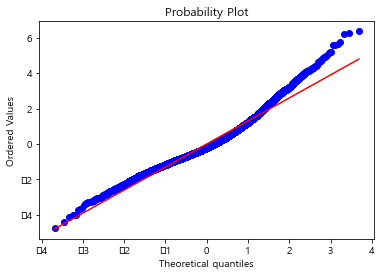

In [37]:
# 잔차의 정규성 확인

import pandas as pd
import statsmodels.formula.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# 조금 다른 방법으로 회귀분석 수행

res2 = sm.ols(formula='rent_ua ~ usage_area + cont_area + 지하총층 + 지상총층 + 연면적m2 + 주차대수 + 승강기수 + 지하철거리m + 승객수점수 + 횡단보도거리m + 건물별전기사용량 + 본번별평균사용량 + 건물연차 + 공시지가 + 가까운아파트총세대수 + 가까운아파트평균평당가 + 아파트거리 + 주변세대수점수 + 주변평당가점수 + 평균월매출금액 + 평균월매출건수 + 평균주중매출금액 + 평균주말매출금액 + type_근린상가 + type_기타상가 + type_단지내상가 + type_복합상가 + 주차가능여부 + 승강기여부', data = z8)

# 회귀분석 결과에서 잔차만 추출

resid = res2.fit().resid

# Q-Q Plot을 그려서 정규성 확인

from scipy.stats import probplot

plt.figure()
probplot(resid, plot=plt)
plt.show()

## 다중공선성 10 이상 변수 제외, p-value > 0.05 변수 제외

In [39]:
model3 = ols('rent_ua ~ usage_area + 지하총층 + 승객수점수 + 횡단보도거리m + 건물별전기사용량 + 본번별평균사용량 + 건물연차 + 공시지가 + 평균주중매출금액 + 평균주말매출금액 + type_근린상가 + type_기타상가 + 주차가능여부', z8)

# 모형 적합

res = model3.fit()

# 분석 결과 확인

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                rent_ua   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     201.3
Date:                Wed, 14 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:26:03   Log-Likelihood:                -10464.
No. Observations:                6142   AIC:                         2.096e+04
Df Residuals:                    6128   BIC:                         2.105e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7486      0.810      4.629      0.000       2.161       5.336
usage_area    -0.0003   3.35e-05     -8.179      0.000      -0.000      -0.000
지하총층          -0.2971      0.041     -7.261      0.000      -0.377      -0.217
승객수점수       5.767e-06   6.04e-07      9.551      0.000    4.58e-06    6.95e-06
횡단보도거리m       -0.0014      0.000     -3.642      0.000      -0.002      -0.001
건물별전기사용량    2.662e-05   4.51e-06      5.904      0.000    1.78e-05    3.55e-05
본번별평균사용량    2.416e-05   5.35e-06      4.512      0.000    1.37e-05    3.47e-05
건물연차          -0.0064      0.002     -3.778      0.000      -0.010      -0.003
공시지가        2.857e-07   8.24e-09     34.666      0.000     2.7e-07    3.02e-07
평균주중매출금액   -5.094e-10   9.38e-11     -5.434      0.000   -6.93e-10   -3.26e-10
평균주말매출금액    1.782e-09   2.32e-10      7.691      0.000    1.33e-09    2.24e-09
type_근린상가     -1.7774      0.799     -2.225      0.026      -3.343      -0.212
type_기타상가     -2.0385      0.801     -2.545      0.011      -3.609      -0.468
주차가능여부        -0.1252      0.041     -3.084      0.002      -0.205      -0.046
==============================================================================
Omnibus:                      640.361   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              969.671
Skew:                           0.777   Prob(JB):                    2.75e-211
Kurtosis:                       4.171   Cond. No.                     7.58e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.58e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""